https://www.udemy.com/course/python-for-data-science-and-machine-learning-bootcamp/learn/lecture/17739782#overview

<a href="https://www.pieriandata.com"><img src="../Pierian_Data_Logo.PNG"></a>
<strong><center>Copyright by Pierian Data Inc.</center></strong> 
<strong><center>Created by Jose Marcial Portilla.</center></strong>

# Keras Regression Code Along Project 

Let's now apply our knowledge to a more realistic data set. Here we will also focus on feature engineering and cleaning our data!

## The Data

We will be using data from a Kaggle data set:

https://www.kaggle.com/harlfoxem/housesalesprediction

#### Feature Columns
    
* id - Unique ID for each home sold
* date - Date of the home sale
* price - Price of each home sold
* bedrooms - Number of bedrooms
* bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower
* sqft_living - Square footage of the apartments interior living space
* sqft_lot - Square footage of the land space
* floors - Number of floors
* waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not
* view - An index from 0 to 4 of how good the view of the property was
* condition - An index from 1 to 5 on the condition of the apartment,
* grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.
* sqft_above - The square footage of the interior housing space that is above ground level
* sqft_basement - The square footage of the interior housing space that is below ground level
* yr_built - The year the house was initially built
* yr_renovated - The year of the house’s last renovation
* zipcode - What zipcode area the house is in
* lat - Lattitude
* long - Longitude
* sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
* sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('kc_house_data.csv')

# Exploratory Data Analysis

In [5]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21613.0,4.580302e+09,2.876566e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21613.0,5.400881e+05,3.671272e+05,7.500000e+04,3.219500e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21613.0,3.370842e+00,9.300618e-01,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21613.0,2.114757e+00,7.701632e-01,0.000000e+00,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21613.0,2.079900e+03,9.184409e+02,2.900000e+02,1.427000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21613.0,1.510697e+04,4.142051e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068800e+04,1.651359e+06
floors,21613.0,1.494309e+00,5.399889e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21613.0,7.541757e-03,8.651720e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21613.0,2.343034e-01,7.663176e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21613.0,3.409430e+00,6.507430e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


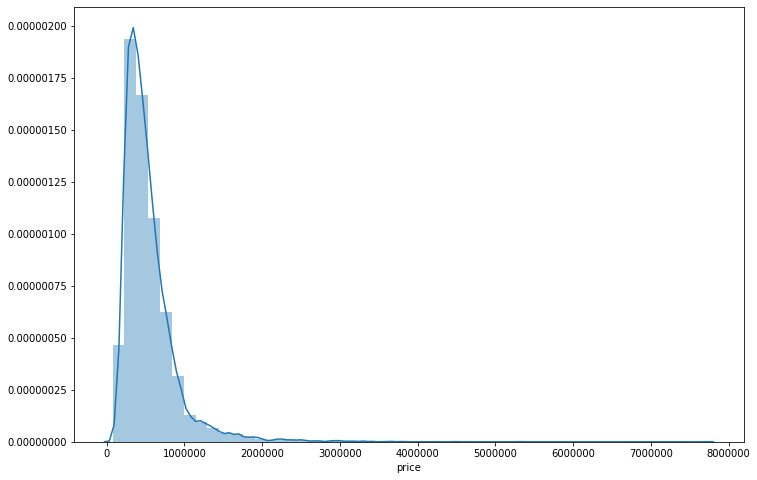

In [7]:
plt.figure(figsize=(12,8))
sns.distplot(df['price'])

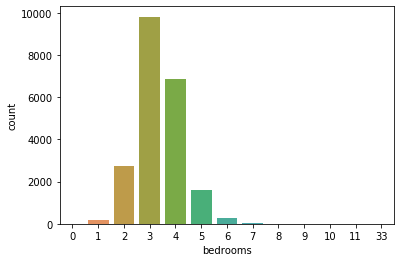

In [8]:
sns.countplot(df['bedrooms'])

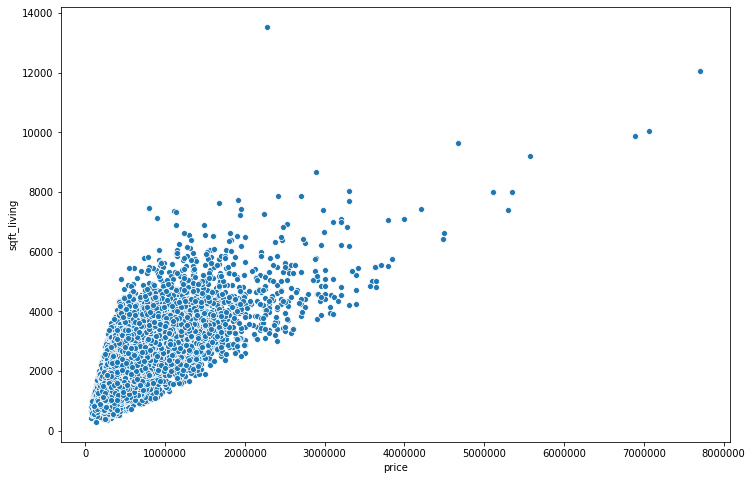

In [9]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='price',y='sqft_living',data=df)

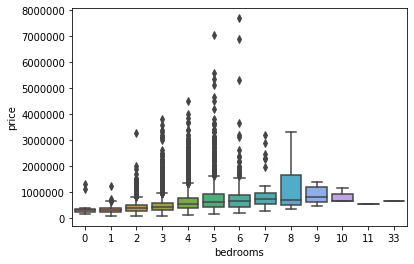

In [10]:
sns.boxplot(x='bedrooms',y='price',data=df)

### Geographical Properties

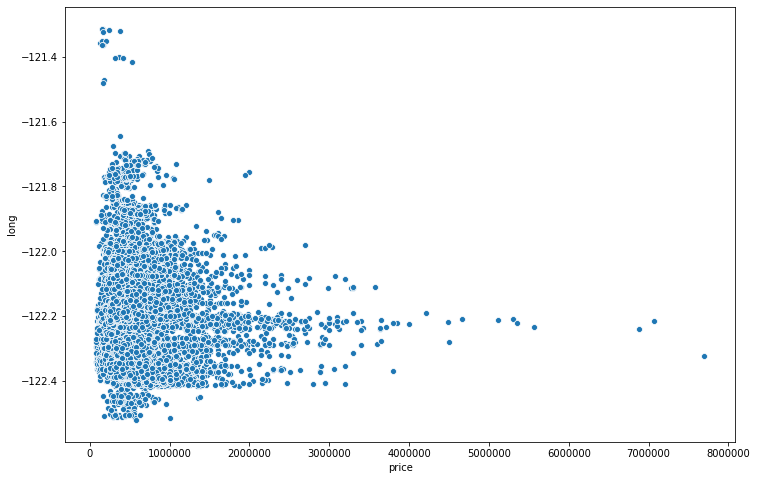

In [11]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='price',y='long',data=df)

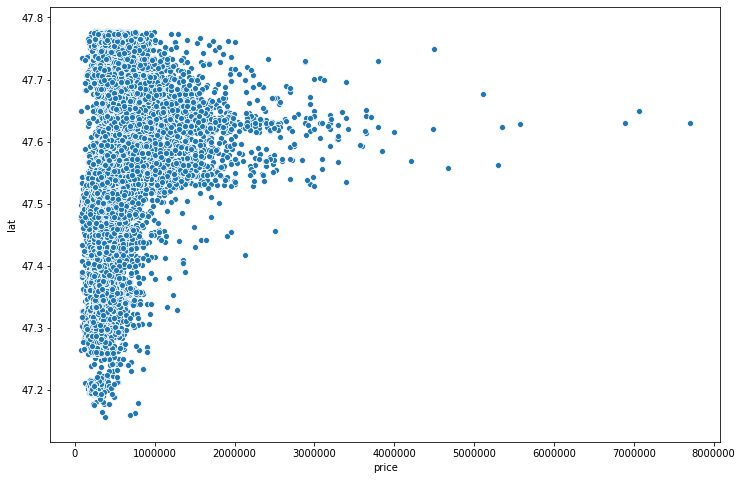

In [12]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='price',y='lat',data=df)

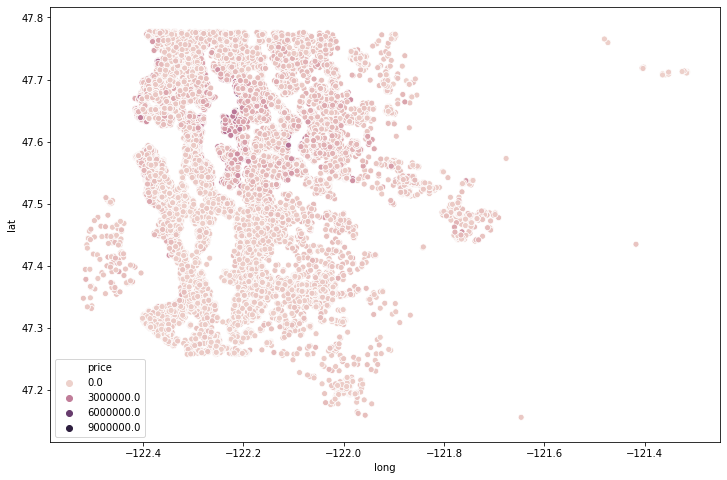

In [13]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='long',y='lat',data=df,hue='price')

In [14]:
df.sort_values('price',ascending=False).head(20)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7252,6762700020,20141013T000000,7700000.0,6,8.00,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
3914,9808700762,20140611T000000,7062500.0,5,4.50,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
9254,9208900037,20140919T000000,6885000.0,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
4411,2470100110,20140804T000000,5570000.0,5,5.75,9200,35069,2.0,0,0,...,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
1448,8907500070,20150413T000000,5350000.0,5,5.00,8000,23985,2.0,0,4,...,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
1315,7558700030,20150413T000000,5300000.0,6,6.00,7390,24829,2.0,1,4,...,12,5000,2390,1991,0,98040,47.5631,-122.210,4320,24619
1164,1247600105,20141020T000000,5110800.0,5,5.25,8010,45517,2.0,1,4,...,12,5990,2020,1999,0,98033,47.6767,-122.211,3430,26788
8092,1924059029,20140617T000000,4668000.0,5,6.75,9640,13068,1.0,1,4,...,12,4820,4820,1983,2009,98040,47.5570,-122.210,3270,10454
2626,7738500731,20140815T000000,4500000.0,5,5.50,6640,40014,2.0,1,4,...,12,6350,290,2004,0,98155,47.7493,-122.280,3030,23408
8638,3835500195,20140618T000000,4489000.0,4,3.00,6430,27517,2.0,0,0,...,12,6430,0,2001,0,98004,47.6208,-122.219,3720,14592


In [15]:
len(df)*(0.01)

216.13

In [16]:
non_top_1_perc = df.sort_values('price',ascending=False).iloc[216:]

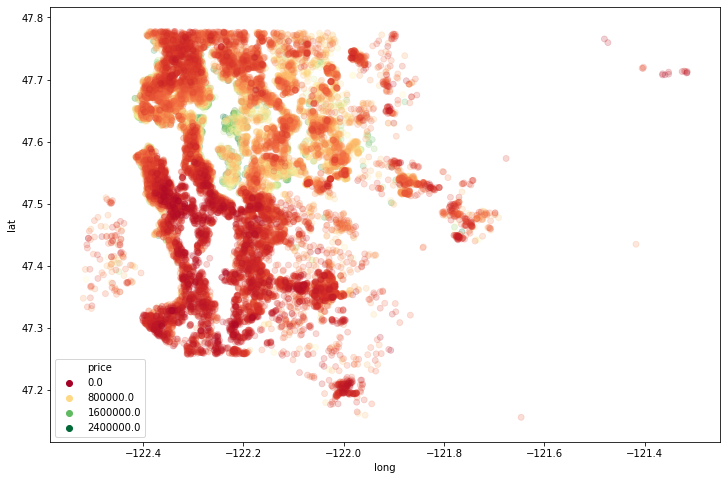

In [17]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='long',y='lat',
                data=non_top_1_perc,hue='price',
                palette='RdYlGn',edgecolor=None,alpha=0.2)

### Other Features

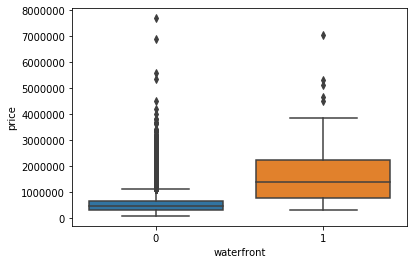

In [18]:
sns.boxplot(x='waterfront',y='price',data=df)

## Working with Feature Data

In [19]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


In [21]:
df = df.drop('id',axis=1)

In [22]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### Feature Engineering from Date

In [23]:
df['date'] = pd.to_datetime(df['date'])

In [24]:
df['month'] = df['date'].apply(lambda date:date.month)

In [25]:
df['year'] = df['date'].apply(lambda date:date.year)

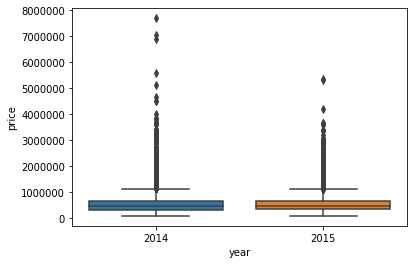

In [26]:
sns.boxplot(x='year',y='price',data=df)

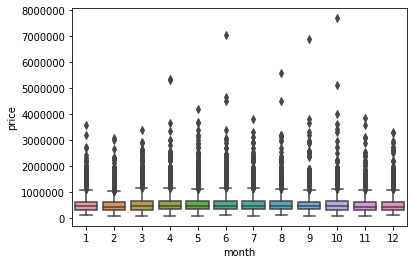

In [27]:
sns.boxplot(x='month',y='price',data=df)

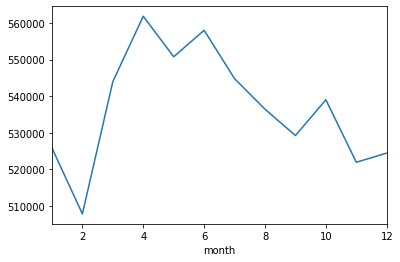

In [28]:
df.groupby('month').mean()['price'].plot()

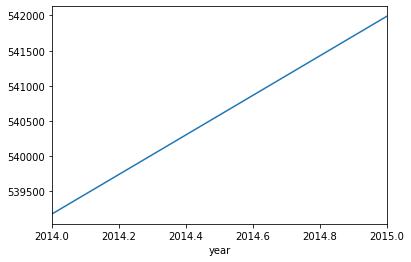

In [29]:
df.groupby('year').mean()['price'].plot()

In [30]:
df = df.drop('date',axis=1)

In [31]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'month', 'year'],
      dtype='object')

In [32]:
# https://i.pinimg.com/originals/4a/ab/31/4aab31ce95d5b8474fd2cc063f334178.jpg
# May be worth considering to remove this or feature engineer categories from it
df['zipcode'].value_counts()

98103    602
98038    590
98115    583
98052    574
98117    553
98042    548
98034    545
98118    508
98023    499
98006    498
98133    494
98059    468
98058    455
98155    446
98074    441
98033    432
98027    412
98125    410
98056    406
98053    405
98001    362
98075    359
98126    354
98092    351
98144    343
98106    335
98116    330
98029    321
98004    317
98199    317
        ... 
98168    269
98112    269
98055    268
98107    266
98136    263
98178    262
98030    256
98177    255
98166    254
98022    234
98105    229
98045    221
98002    199
98077    198
98011    195
98019    190
98108    186
98119    184
98005    168
98007    141
98188    136
98032    125
98014    124
98070    118
98109    109
98102    105
98010    100
98024     81
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

In [33]:
df = df.drop('zipcode',axis=1)

In [34]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,month,year
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,10,2014
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639,12,2014
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062,2,2015
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000,12,2014
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503,2,2015


In [35]:
# could make sense due to scaling, higher should correlate to more value
df['yr_renovated'].value_counts()

0       20699
2014       91
2013       37
2003       36
2000       35
2007       35
2005       35
2004       26
1990       25
2006       24
2009       22
1989       22
2002       22
1991       20
2001       19
1998       19
1994       19
1993       19
1987       18
1983       18
1984       18
2010       18
2008       18
1986       17
1985       17
1999       17
1992       17
2015       16
1995       16
1996       15
        ...  
1975        6
1978        6
1981        5
1964        5
1965        5
1958        5
1973        5
1969        4
1972        4
1960        4
1963        4
1956        3
1945        3
1974        3
1953        3
1955        3
1976        3
1957        3
1962        2
1950        2
1967        2
1946        2
1971        2
1940        2
1954        1
1934        1
1959        1
1951        1
1948        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

In [36]:
df['sqft_basement'].value_counts()

0       13126
600       221
700       218
500       214
800       206
400       184
1000      149
900       144
300       142
200       108
530       107
480       106
750       105
450       103
720       102
620        91
580        85
840        85
420        81
860        80
1100       80
670        79
780        77
380        76
850        76
550        76
650        76
680        75
240        74
360        73
        ...  
1525        1
2580        1
2500        1
2180        1
1990        1
1284        1
516         1
276         1
20          1
915         1
2850        1
1798        1
2310        1
266         1
2120        1
1913        1
1481        1
3480        1
3000        1
2600        1
2360        1
1960        1
295         1
1880        1
1816        1
792         1
2590        1
935         1
2390        1
248         1
Name: sqft_basement, Length: 306, dtype: int64

### Saved preprocessed data

In [67]:
df.to_csv('kc_house_preprocessed.csv',index=False)

## Scaling and Train Test Split

In [37]:
X = df.drop('price',axis=1)
y = df['price']

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

### Scaling

In [40]:
from sklearn.preprocessing import MinMaxScaler

In [41]:
scaler = MinMaxScaler()

In [42]:
X_train= scaler.fit_transform(X_train)

In [43]:
X_test = scaler.transform(X_test)

In [44]:
X_train.shape

(15129, 19)

In [45]:
X_test.shape

(6484, 19)

## Creating a Model

In [46]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [47]:
model = Sequential()

model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

## Training the Model

In [48]:
model.fit(x=X_train,y=y_train.values,
          validation_data=(X_test,y_test.values),
          batch_size=128,epochs=400)

Train on 15129 samples, validate on 6484 samples
Epoch 1/400
15129/15129 [==============================] - 1s 47us/sample - loss: 423628964543.9196 - val_loss: 433027442060.0814
Epoch 2/400
15129/15129 [==============================] - 0s 16us/sample - loss: 422801927208.9492 - val_loss: 430091218501.8038
Epoch 3/400
15129/15129 [==============================] - 0s 15us/sample - loss: 411661877155.9490 - val_loss: 404368313314.3097
Epoch 4/400
15129/15129 [==============================] - 0s 14us/sample - loss: 357054833868.6105 - val_loss: 312032442404.6391
Epoch 5/400
15129/15129 [==============================] - 0s 13us/sample - loss: 232136785720.7366 - val_loss: 167772862258.0629
Epoch 6/400
15129/15129 [==============================] - 0s 13us/sample - loss: 122331698861.7125 - val_loss: 107614141170.2603
Epoch 7/400
15129/15129 [==============================] - 0s 14us/sample - loss: 99494247199.3549 - val_loss: 103558991515.7162
Epoch 8/400
15129/15129 [=================

15129/15129 [==============================] - 0s 13us/sample - loss: 41922588524.1769 - val_loss: 41816533036.2196
Epoch 65/400
15129/15129 [==============================] - 0s 14us/sample - loss: 41668384814.4316 - val_loss: 41555497210.1567
Epoch 66/400
15129/15129 [==============================] - 0s 14us/sample - loss: 41400319917.4248 - val_loss: 41310978583.6891
Epoch 67/400
15129/15129 [==============================] - 0s 15us/sample - loss: 41166108100.7421 - val_loss: 41011604467.9975
Epoch 68/400
15129/15129 [==============================] - 0s 16us/sample - loss: 40915368830.3840 - val_loss: 40709723034.2949
Epoch 69/400
15129/15129 [==============================] - 0s 15us/sample - loss: 40625636185.4283 - val_loss: 40505177269.3004
Epoch 70/400
15129/15129 [==============================] - 0s 14us/sample - loss: 40411821210.1178 - val_loss: 40204629532.1110
Epoch 71/400
15129/15129 [==============================] - 0s 17us/sample - loss: 40173308230.5104 - val_loss

Epoch 190/400
15129/15129 [==============================] - 0s 14us/sample - loss: 32247302286.8145 - val_loss: 31547836551.1857
Epoch 191/400
15129/15129 [==============================] - 0s 14us/sample - loss: 32220377343.8816 - val_loss: 31531638808.0049
Epoch 192/400
15129/15129 [==============================] - 0s 13us/sample - loss: 32170126868.6100 - val_loss: 31534769591.0376
Epoch 193/400
15129/15129 [==============================] - 0s 12us/sample - loss: 32166163475.0194 - val_loss: 31480752711.6990
Epoch 194/400
15129/15129 [==============================] - 0s 14us/sample - loss: 32111897537.2564 - val_loss: 31480478918.9883
Epoch 195/400
15129/15129 [==============================] - 0s 13us/sample - loss: 32083820117.8579 - val_loss: 31433870051.0993
Epoch 196/400
15129/15129 [==============================] - 0s 14us/sample - loss: 32098428513.9057 - val_loss: 31415022315.9432
Epoch 197/400
15129/15129 [==============================] - 0s 14us/sample - loss: 320556

15129/15129 [==============================] - 0s 14us/sample - loss: 31030333723.1923 - val_loss: 30452963933.1771
Epoch 254/400
15129/15129 [==============================] - 0s 14us/sample - loss: 31046882008.8275 - val_loss: 30453614442.9167
Epoch 255/400
15129/15129 [==============================] - 0s 13us/sample - loss: 31028167005.3878 - val_loss: 30434178056.2122
Epoch 256/400
15129/15129 [==============================] - 0s 13us/sample - loss: 30998990981.4740 - val_loss: 30416995815.0475
Epoch 257/400
15129/15129 [==============================] - 0s 13us/sample - loss: 31018871473.9089 - val_loss: 30415415456.4540
Epoch 258/400
15129/15129 [==============================] - 0s 14us/sample - loss: 30983402875.3721 - val_loss: 30393051115.7853
Epoch 259/400
15129/15129 [==============================] - 0s 13us/sample - loss: 30972155123.5968 - val_loss: 30399550235.9531
Epoch 260/400
15129/15129 [==============================] - 0s 13us/sample - loss: 30933310824.2173 - v

Epoch 316/400
15129/15129 [==============================] - 0s 13us/sample - loss: 30177764647.4432 - val_loss: 29676840007.3831
Epoch 317/400
15129/15129 [==============================] - 0s 15us/sample - loss: 30202181224.3358 - val_loss: 29667798000.2073
Epoch 318/400
15129/15129 [==============================] - 0s 16us/sample - loss: 30142778644.7622 - val_loss: 29676505882.6897
Epoch 319/400
15129/15129 [==============================] - 0s 14us/sample - loss: 30138206175.2407 - val_loss: 29690241022.7366
Epoch 320/400
15129/15129 [==============================] - 0s 15us/sample - loss: 30147481204.1806 - val_loss: 29648629580.5947
Epoch 321/400
15129/15129 [==============================] - 0s 14us/sample - loss: 30153977181.0494 - val_loss: 29626251452.2492
Epoch 322/400
15129/15129 [==============================] - 0s 14us/sample - loss: 30073658853.7722 - val_loss: 29619148000.2566
Epoch 323/400
15129/15129 [==============================] - 0s 12us/sample - loss: 300784

15129/15129 [==============================] - 0s 13us/sample - loss: 29357301576.8455 - val_loss: 29041119924.3529
Epoch 380/400
15129/15129 [==============================] - 0s 14us/sample - loss: 29342972936.1898 - val_loss: 29030259502.9044
Epoch 381/400
15129/15129 [==============================] - 0s 13us/sample - loss: 29341246354.5540 - val_loss: 29038774173.4534
Epoch 382/400
15129/15129 [==============================] - 0s 12us/sample - loss: 29350187017.5435 - val_loss: 28992967603.5632
Epoch 383/400
15129/15129 [==============================] - 0s 13us/sample - loss: 29324310513.3801 - val_loss: 28995401433.6237
Epoch 384/400
15129/15129 [==============================] - 0s 13us/sample - loss: 29302453977.8428 - val_loss: 29006560756.9451
Epoch 385/400
15129/15129 [==============================] - 0s 13us/sample - loss: 29305894906.4499 - val_loss: 29012453427.8001
Epoch 386/400
15129/15129 [==============================] - 0s 14us/sample - loss: 29278962250.5546 - v

In [49]:
losses = pd.DataFrame(model.history.history)

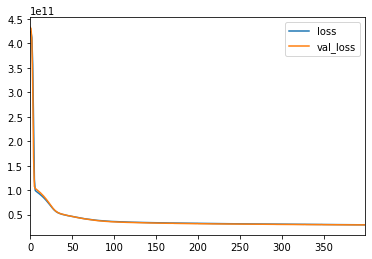

In [50]:
losses.plot()

# Evaluation on Test Data

https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics

In [51]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

#### Predicting on Brand New Data

In [52]:
X_test

array([[0.18181818, 0.125     , 0.05735849, ..., 0.010289  , 0.        ,
        1.        ],
       [0.36363636, 0.28125   , 0.13207547, ..., 0.00909894, 0.27272727,
        1.        ],
       [0.36363636, 0.3125    , 0.16679245, ..., 0.00418246, 0.09090909,
        1.        ],
       ...,
       [0.27272727, 0.25      , 0.17584906, ..., 0.00821673, 0.90909091,
        0.        ],
       [0.18181818, 0.125     , 0.04603774, ..., 0.0044122 , 0.27272727,
        1.        ],
       [0.36363636, 0.4375    , 0.24226415, ..., 0.01018447, 0.72727273,
        0.        ]])

In [53]:
predictions = model.predict(X_test)

In [54]:
mean_absolute_error(y_test,predictions)

105708.91072857226

In [55]:
np.sqrt(mean_squared_error(y_test,predictions))

170217.90360786224

In [56]:
explained_variance_score(y_test,predictions)

0.7940865583181661

In [57]:
df['price'].mean()

540088.1417665294

In [58]:
df['price'].median()

450000.0

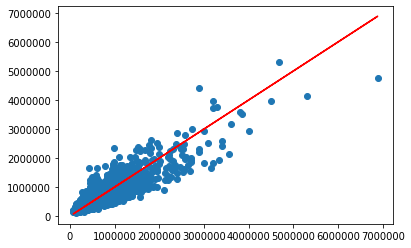

In [59]:
# Our predictions
plt.scatter(y_test,predictions)

# Perfect predictions
plt.plot(y_test,y_test,'r')

In [60]:
errors = y_test.values.reshape(6480, 1) - predictions

ValueError: cannot reshape array of size 6484 into shape (6480,1)

In [61]:
sns.distplot(errors)

NameError: name 'errors' is not defined

-------------
### Predicting on a brand new house

In [62]:
single_house = df.drop('price',axis=1).iloc[0]

In [63]:
single_house = scaler.transform(single_house.values.reshape(-1, 19))

In [64]:
single_house

array([[0.27272727, 0.125     , 0.06716981, 0.00310751, 0.        ,
        0.        , 0.        , 0.5       , 0.5       , 0.09758772,
        0.        , 0.47826087, 0.        , 0.57149751, 0.21760797,
        0.16193426, 0.00573322, 0.81818182, 0.        ]])

In [65]:
model.predict(single_house)

array([[285129.]], dtype=float32)

In [66]:
df.iloc[0]

price            221900.0000
bedrooms              3.0000
bathrooms             1.0000
sqft_living        1180.0000
sqft_lot           5650.0000
floors                1.0000
waterfront            0.0000
view                  0.0000
condition             3.0000
grade                 7.0000
sqft_above         1180.0000
sqft_basement         0.0000
yr_built           1955.0000
yr_renovated          0.0000
lat                  47.5112
long               -122.2570
sqft_living15      1340.0000
sqft_lot15         5650.0000
month                10.0000
year               2014.0000
Name: 0, dtype: float64